<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/CARS4U_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/usedcars.csv')

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [ ]:
data.shape

(7253, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [ ]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [ ]:
df=data.copy()

#DATA PREPROCESSING

**feature engineering**

#MILEAGE

In [ ]:
#MILEAGE
df['Mileage'].head(10)

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
5    21.1 km/kg
6    23.08 kmpl
7    11.36 kmpl
8    20.54 kmpl
9     22.3 kmpl
Name: Mileage, dtype: object

In [ ]:
df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [ ]:
df_mileage[1].value_counts() # checking if there are different units

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [ ]:
df["mileage_num"] = df_mileage[0].astype(float)
df["mileage_unit"] = df_mileage[1]

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl


In [ ]:
# Let's check if the units correspond to the fuel types
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

#ENGINE

In [ ]:
df['Engine'].head(10)

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
5     814 CC
6    1461 CC
7    2755 CC
8    1598 CC
9    1248 CC
Name: Engine, dtype: object

In [ ]:
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [ ]:
df_engine[1].value_counts()

CC    7207
Name: 1, dtype: int64

In [ ]:
df["engine_num"] = df_engine[0].astype(float)


df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0


#POWER

In [ ]:
df['Power'].head(10)

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
5     55.2 bhp
6     63.1 bhp
7    171.5 bhp
8    103.6 bhp
9       74 bhp
Name: Power, dtype: object

In [ ]:
df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp


In [ ]:
df_power[1].value_counts()

bhp    7078
Name: 1, dtype: int64

In [ ]:
df["power_num"] = df_power[0].astype(float)  # Complete the code to create a new column for "Power" values

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80


In [ ]:
df['Name'].nunique()   #check number of unique values

2041

# 4. EXTRACTING 'BRAND' FROM 'NAME'

In [ ]:
# extracting brand names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi


In [ ]:
# checking the unique values and their number of occurences
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

#5. EXTRACTING 'MODEL' FROM 'NAME'

In [ ]:
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti,wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai,creta
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda,jazz
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti,ertiga
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi,a4


In [ ]:
df["Model"].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

#DEALING W/ ANOMALOUS VALUES

before we start exploring the data further, lets quickly check the missingness in the data

In [ ]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
mileage_num             2
mileage_unit            2
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [ ]:
# dropping the redundant columns.
df.drop(columns=["Mileage", "Engine", "Power"], inplace=True)

In [ ]:
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)
# complete the code to check extreme values at the higher end in "Kilometers_Driven" column

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,5.0,55.07,65.00,15.97,kmpl,2993.0,258.00,bmw,x5
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,5.0,25.83,7.50,19.30,kmpl,1968.0,141.00,skoda,octavia
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,5.0,13.23,5.90,20.54,kmpl,1598.0,103.60,volkswagen,vento
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,5.0,10.25,2.70,20.36,kmpl,1197.0,78.90,hyundai,i10
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,5.0,10.15,13.00,16.96,kmpl,1968.0,138.03,volkswagen,jetta
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,5.0,13.58,5.00,17.40,kmpl,1497.0,117.30,honda,city
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,5.0,10.25,4.45,18.50,kmpl,1197.0,82.90,hyundai,i20
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,5.0,7.88,NaN,23.40,kmpl,1248.0,74.00,maruti,swift
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,5.0,7.63,1.00,17.00,kmpl,1405.0,70.00,tata,indigo
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,8.0,24.01,4.00,12.80,kmpl,2494.0,102.00,toyota,innova


In [ ]:
# Complete the code to add the row index where the anomalous value is present
df.loc[0,"Kilometers_Driven"] = np.nan

In [ ]:
# complete the code to check extreme values at the lower end in "Kilometers_Driven" column
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171.0,Petrol,Manual,First,5.0,4.36,3.60,24.70,kmpl,796.0,47.30,maruti,alto
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600.0,Petrol,Automatic,First,5.0,6.80,6.25,21.50,kmpl,1197.0,81.80,maruti,wagon
1161,1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000.0,Petrol,Automatic,First,5.0,7.15,6.85,20.30,kmpl,1199.0,84.00,tata,tigor
2054,2054,Maruti Ignis 1.2 Alpha,Mumbai,2017,1000.0,Petrol,Manual,First,5.0,7.87,6.36,20.89,kmpl,1197.0,81.80,maruti,ignis
6201,6201,Maruti Alto LXI,Kolkata,2019,1000.0,Petrol,Manual,First,5.0,3.99,NaN,24.70,kmpl,796.0,47.30,maruti,alto
2646,2646,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000.0,Petrol,Manual,First,5.0,7.65,6.80,18.12,kmpl,1196.0,86.80,ford,figo
1242,1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000.0,Diesel,Automatic,First,5.0,52.77,40.00,13.60,kmpl,1999.0,177.00,jaguar,xe
1598,1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000.0,Diesel,Manual,First,5.0,7.63,7.50,13.49,kmpl,2179.0,138.03,tata,xenon
5941,5941,Renault KWID RXL,Pune,2018,1000.0,Petrol,Manual,First,5.0,4.45,3.40,25.17,kmpl,799.0,53.30,renault,kwid
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000.0,Petrol,Manual,First,5.0,6.74,5.68,18.78,kmpl,999.0,75.00,volkswagen,polo


#OBSERVATIONS

In [ ]:
df.sort_values(by=["Seats"], ascending=True).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000.0,Petrol,Automatic,First,0.0,53.14,18.00,10.5,kmpl,3197.0,NaN,audi,a4
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732.0,Petrol,Automatic,First,2.0,49.49,55.54,18.1,kmpl,3498.0,306.0,mercedes-benz,slk-class
798,798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000.0,Petrol,Automatic,First,2.0,49.49,55.00,18.1,kmpl,3498.0,306.0,mercedes-benz,slk-class
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500.0,Petrol,Automatic,Third,2.0,11.30,120.00,6.4,kmpl,5204.0,560.0,lamborghini,gallardo
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000.0,Petrol,Automatic,First,2.0,49.49,29.50,8.1,kmpl,5461.0,387.3,mercedes-benz,sl-class


#OBSERVATIONS

In [ ]:
df[df["Name"].str.startswith("Audi A4")]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi,a4
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648.0,Diesel,Automatic,First,5.0,53.14,21.43,17.11,kmpl,1968.0,174.33,audi,a4
65,65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664.0,Diesel,Automatic,First,5.0,53.14,13.50,16.55,kmpl,1968.0,140.00,audi,a4
103,103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000.0,Diesel,Automatic,First,5.0,53.14,9.80,14.94,kmpl,2967.0,241.40,audi,a4
150,150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214.0,Diesel,Automatic,First,5.0,53.14,23.32,17.11,kmpl,1968.0,174.33,audi,a4
717,717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979.0,Diesel,Automatic,Second,5.0,53.14,19.50,17.11,kmpl,1968.0,174.33,audi,a4
853,853,Audi A4 2.0 TDI,Delhi,2011,46000.0,Diesel,Automatic,Second,5.0,53.14,10.99,16.55,kmpl,1968.0,147.51,audi,a4
854,854,Audi A4 2.0 TDI,Kolkata,2012,47346.0,Diesel,Automatic,First,5.0,53.14,14.50,16.55,kmpl,1968.0,147.51,audi,a4
874,874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000.0,Diesel,Automatic,First,5.0,53.14,12.50,16.55,kmpl,1968.0,140.00,audi,a4
964,964,Audi A4 2.0 TDI,Kolkata,2009,34000.0,Diesel,Automatic,First,5.0,53.14,9.95,16.55,kmpl,1968.0,147.51,audi,a4


#OBSERVATIONS

In [ ]:
df.loc[0, "Seats"] = 5.0   ## Complete the code to add the row index where the anomalous value is present

In [ ]:
df.sort_values(by=["Seats"], ascending=False).head(5)
# complete the code to check extreme values at the higher end in "Seats" column

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
6875,6875,Toyota Qualis FS B3,Pune,2002,119613.0,Diesel,Manual,Second,10.0,24.01,NaN,13.10,kmpl,2446.0,75.0,toyota,qualis
917,917,Tata Sumo DX,Mumbai,2013,20000.0,Diesel,Manual,First,10.0,7.63,5.25,14.07,kmpl,1978.0,83.1,tata,sumo
2575,2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000.0,Diesel,Manual,First,10.0,11.30,5.50,14.80,kmpl,2499.0,80.0,chevrolet,tavera
6242,6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000.0,Diesel,Manual,Second,10.0,7.63,NaN,12.20,kmpl,1948.0,68.0,tata,sumo
1907,1907,Toyota Qualis FS B3,Bangalore,2002,63000.0,Diesel,Manual,Third,10.0,24.01,3.65,13.10,kmpl,2446.0,75.0,toyota,qualis


In [ ]:
df.sort_values(by=["mileage_num"], ascending=True).head(10)
# complete the code to check extreme values at the lower end in "mileage_num" column

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000.0,Petrol,Manual,First,5.0,4.55,1.12,0.0,kmpl,1086.0,NaN,hyundai,santro
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483.0,Petrol,Automatic,First,5.0,4.55,2.30,0.0,kmpl,999.0,NaN,hyundai,santro
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000.0,Petrol,Manual,Second,NaN,13.58,1.85,0.0,kmpl,NaN,NaN,honda,city
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021.0,Diesel,Manual,First,5.0,10.15,5.45,0.0,kmpl,1968.0,NaN,volkswagen,jetta
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000.0,Diesel,Automatic,First,5.0,120.00,NaN,0.0,kmpl,2179.0,115.0,land,rover
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243.0,Petrol,Manual,First,5.0,4.55,3.35,0.0,kmpl,1086.0,NaN,hyundai,santro
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500.0,Petrol,Manual,Second,5.0,4.55,1.17,0.0,kmpl,1086.0,NaN,hyundai,santro
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000.0,Diesel,Automatic,Second,5.0,120.00,26.00,0.0,kmpl,2179.0,115.0,land,rover
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000.0,Diesel,Automatic,First,5.0,120.00,15.50,0.0,kmpl,2179.0,115.0,land,rover
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000.0,Petrol,Manual,Second,NaN,4.55,3.15,0.0,kmpl,NaN,NaN,hyundai,santro


#OBSERVATIONS

In [ ]:
df.loc[df['mileage_num'] == 'NaN', "mileage_num"] = np.nan # Complete the code with the anomalous value (if any) that has to be replaced with NaN

In [ ]:
df.sort_values(by=["mileage_num"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,Brand,Model
1332,1332,Maruti Wagon R CNG LXI,Pune,2013,79494.0,CNG,Manual,First,5.0,5.54,2.96,33.54,km/kg,998.0,67.04,maruti,wagon
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000.0,CNG,Manual,First,5.0,5.58,3.05,33.54,km/kg,998.0,67.04,maruti,wagon
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202.0,CNG,Manual,First,5.0,5.54,3.90,33.54,km/kg,998.0,67.04,maruti,wagon
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663.0,CNG,Manual,First,5.0,5.35,3.25,33.54,km/kg,998.0,67.04,maruti,wagon
4141,4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200.0,CNG,Manual,First,5.0,5.58,2.85,33.54,km/kg,998.0,67.04,maruti,wagon
3869,3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537.0,CNG,Manual,Second,4.0,4.36,2.10,33.44,km/kg,796.0,40.30,maruti,alto
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600.0,CNG,Manual,First,4.0,4.36,3.50,33.44,km/kg,796.0,40.30,maruti,alto
3553,3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000.0,CNG,Manual,First,4.0,4.36,3.00,33.44,km/kg,796.0,40.30,maruti,alto
4769,4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310.0,CNG,Manual,First,4.0,4.36,3.70,33.44,km/kg,796.0,40.30,maruti,alto
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929.0,CNG,Manual,First,4.0,4.36,NaN,32.26,km/kg,998.0,58.20,maruti,alto


#OBSERVATIONS

In [ ]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.
-------------------------------------------------- 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
-------------

#observations

In [ ]:
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)
 # complete the code to check used car prices grouped by brand

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

#CREATING THE NEW COLUMNS THAT ARE LOG TRANSFORMED

In [ ]:
df["price_log"] = np.log(df["Price"])

In [ ]:
df["new_price_log"] = np.log(df["New_Price"])

# Complete the code to create a new column with the log transformed for new_price variable

In [ ]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"]) # Complete the code to create a new column with the log transformed for Kilometers_Driven variabl

In [ ]:
df.drop(columns=["Name", "mileage_unit"], inplace=True) # complete the code to drop the redundant columns

In [ ]:
## Creating a copy of data to perform EDA in the apendix section
df1 = df.copy()

#EXPLORATORY DATA ANALYSIS

the below functions need to be defined to carry out the Exploratory Data Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#UNIVARIATE ANALYSIS

PRICE

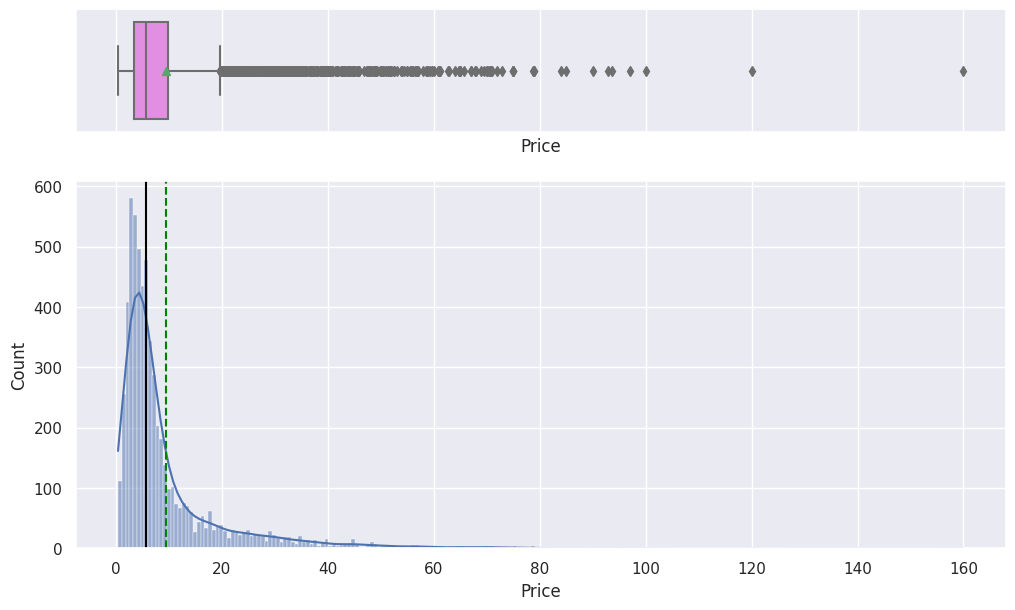

In [ ]:
histogram_boxplot(df1, "Price", kde=True)

PRICE_LOG

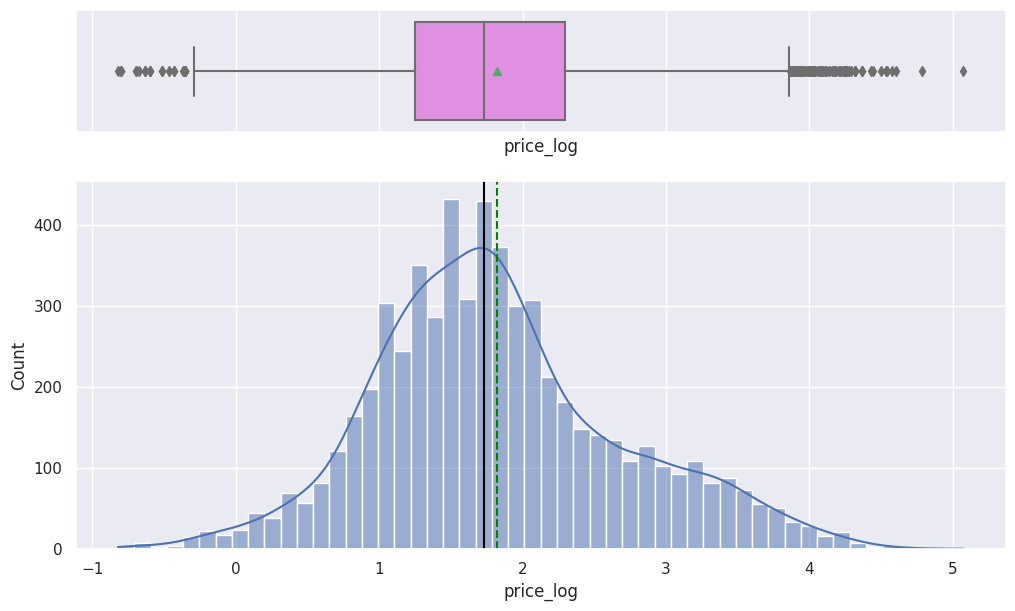

In [ ]:
histogram_boxplot(df1, "price_log", kde=True)

NEW_PRICE

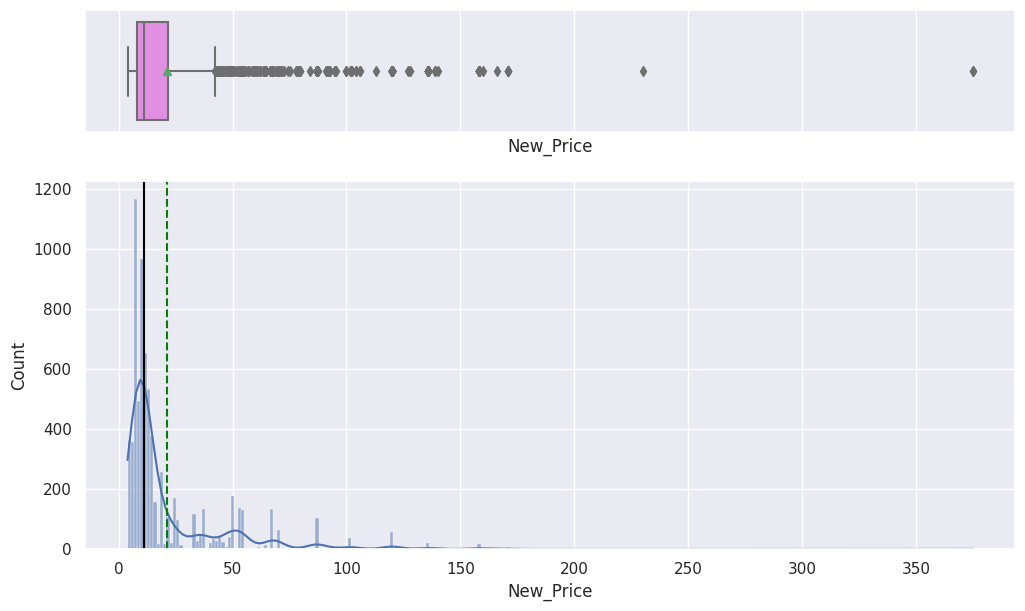

In [ ]:
histogram_boxplot(df1, "New_Price", kde=True)

NEW_PRICE_LOG

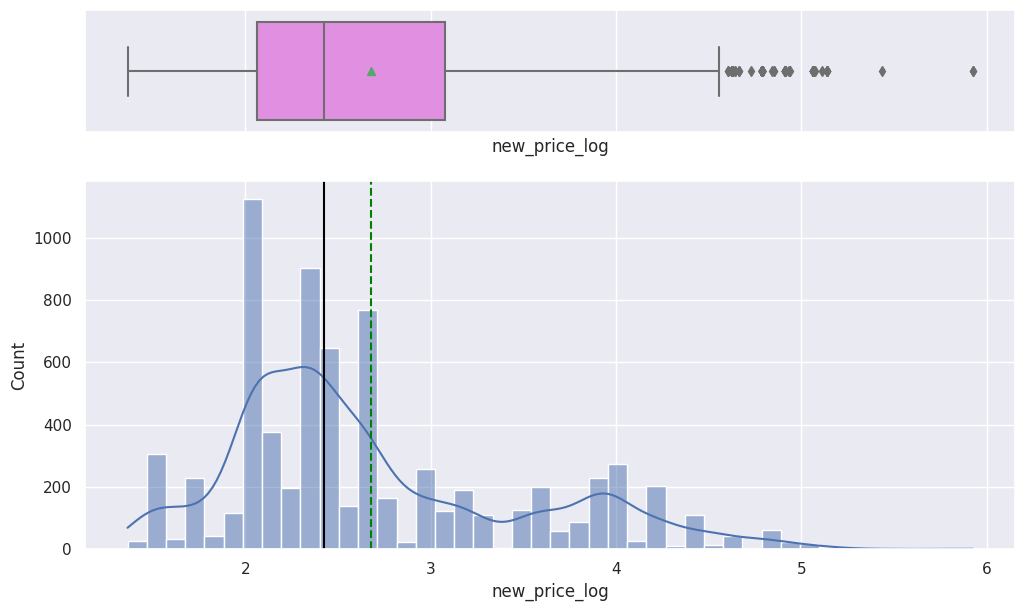

In [ ]:
histogram_boxplot(df1, "new_price_log", kde=True)

KILOMETERS_DRIVEN

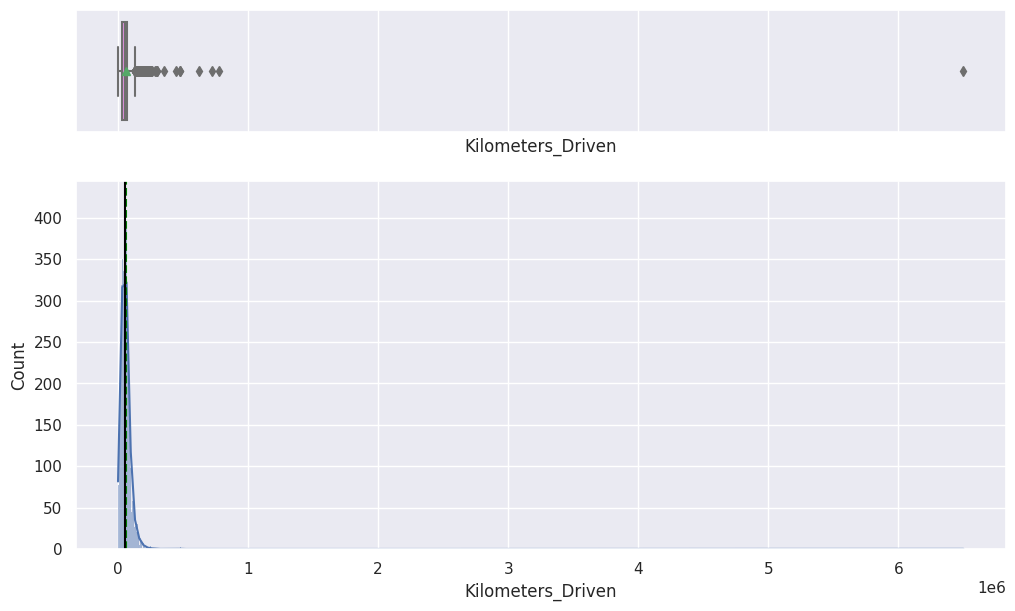

In [ ]:
histogram_boxplot(df1, "Kilometers_Driven", kde=True)

KILOMETERS_DRIVEN_LOG

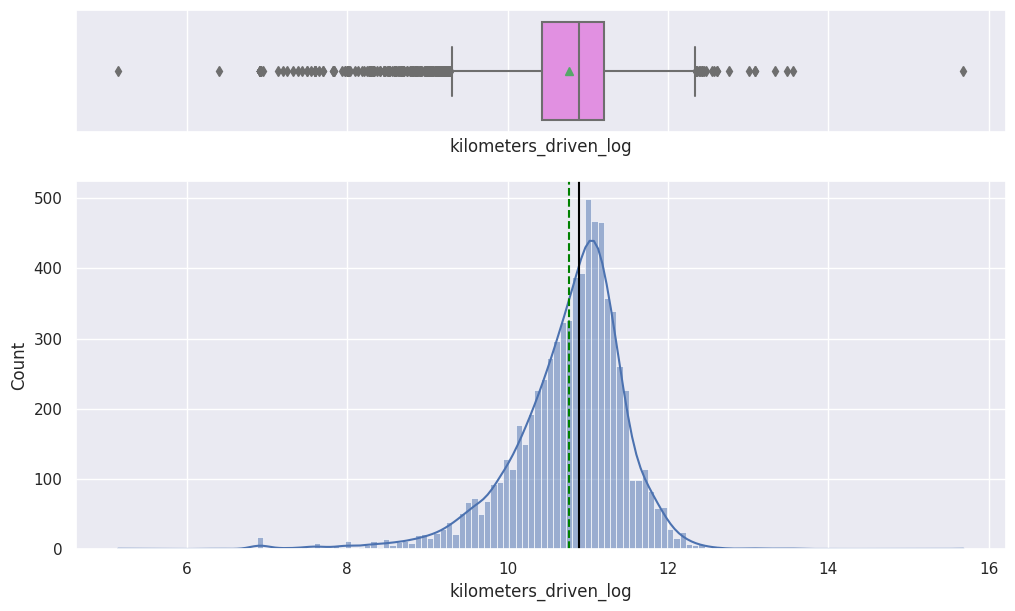

In [ ]:
histogram_boxplot(df1, "kilometers_driven_log", kde=True)

MILEAGE_NUM

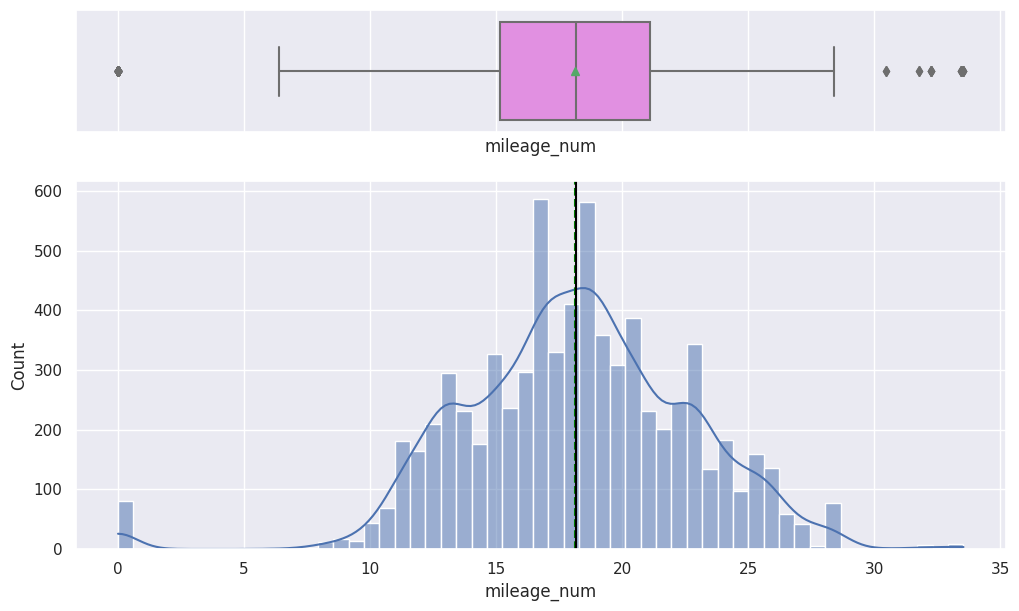

In [ ]:
histogram_boxplot(df1, "mileage_num", kde=True)

ENGINE_NUM

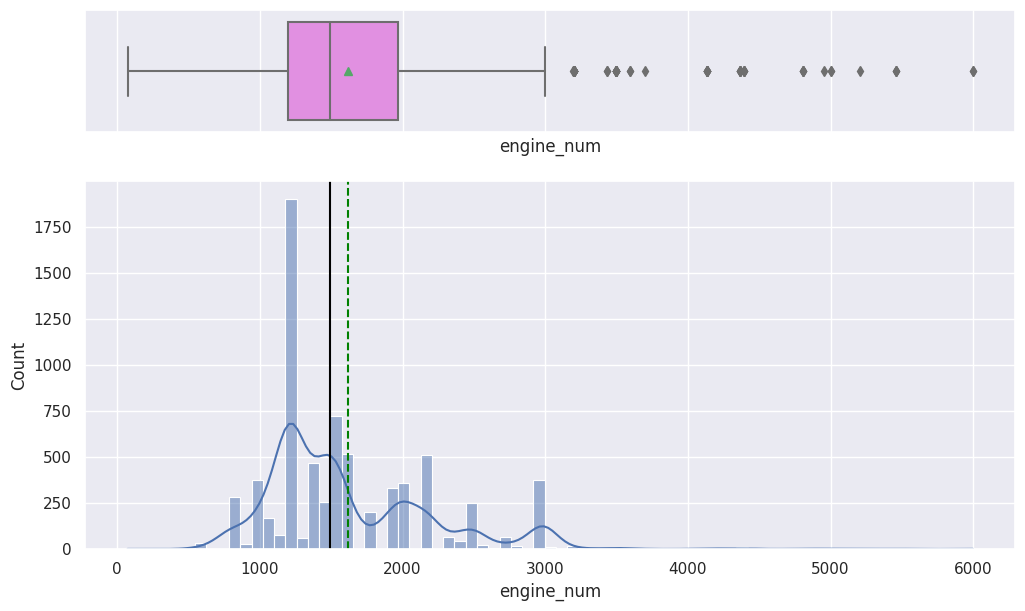

In [ ]:
histogram_boxplot(df1, "engine_num", kde=True)

POWER_NUM

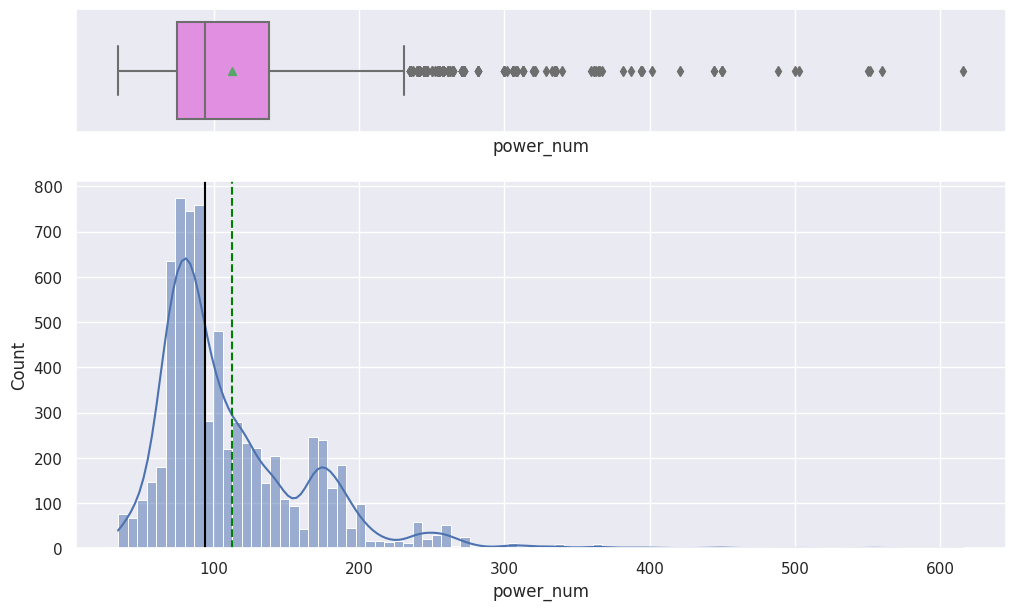

In [ ]:
histogram_boxplot(df1, "power_num", kde=True)

In [ ]:
df1.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price,mileage_num,engine_num,power_num,price_log,new_price_log,kilometers_driven_log
count,7253.000000,7253.000000,7.252000e+03,7200.000000,7253.000000,6019.000000,7251.000000,7207.000000,7078.000000,6019.000000,7253.000000,7252.000000
mean,3626.000000,2013.365366,5.869723e+04,5.279722,21.307322,9.479468,18.141580,1616.573470,112.765214,1.825095,2.677482,10.760919
std,2093.905084,3.254421,8.443340e+04,0.811660,24.256314,11.187917,4.562197,595.285137,53.493553,0.874059,0.793230,0.716359
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000,0.000000,72.000000,34.200000,-0.820981,1.363537,5.141664
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000,15.170000,1198.000000,75.000000,1.252763,2.064328,10.434116
50%,3626.000000,2014.000000,5.340400e+04,5.000000,11.300000,5.640000,18.160000,1493.000000,94.000000,1.729884,2.424803,10.885641
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000,21.100000,1968.000000,138.100000,2.297573,3.076851,11.198215
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000,33.540000,5998.000000,616.000000,5.075174,5.926926,15.687313


In [ ]:
df1.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
0,0,Mumbai,2010,NaN,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon,0.559616,1.706565,NaN
1,1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta,2.525729,2.776332,10.621327
2,2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz,1.504077,2.152924,10.736397
3,3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga,1.791759,2.422144,11.373663
4,4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4,2.875822,3.972930,10.613246


BRAND

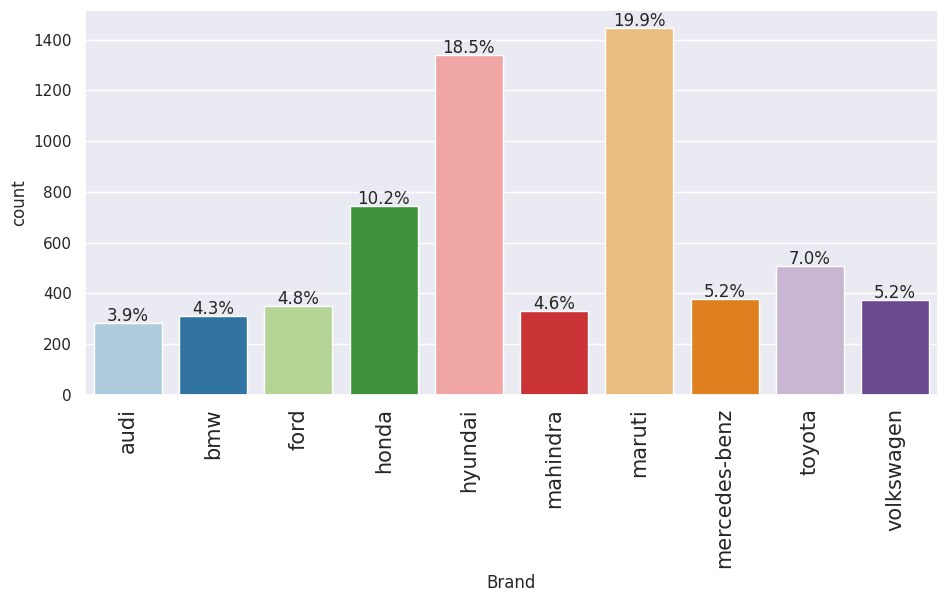

In [ ]:
labeled_barplot(df1, "Brand", perc=True, n=10)

MODEL

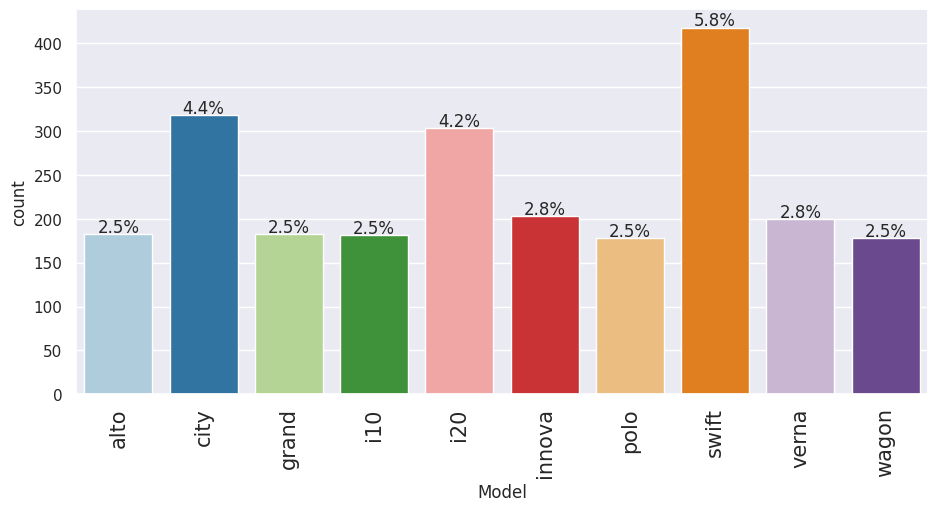

In [ ]:
labeled_barplot(df1, "Model", perc=True, n=10)

SEATS

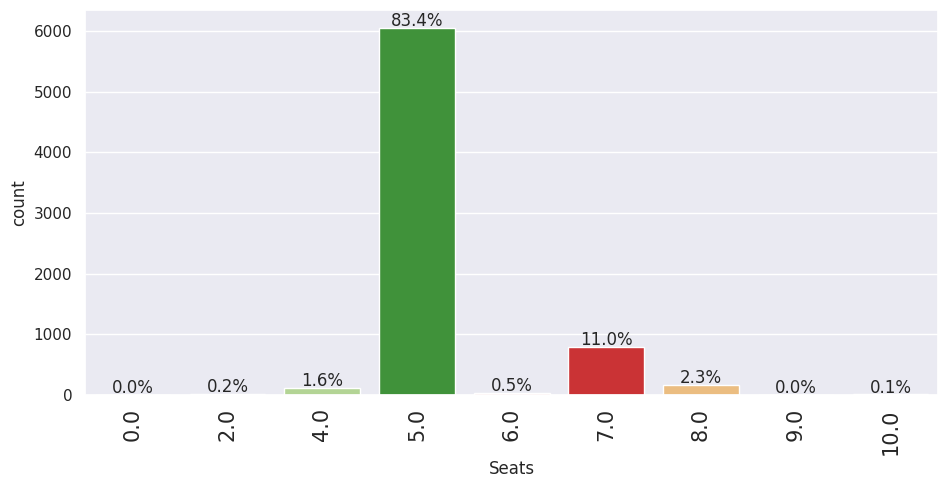

In [ ]:
labeled_barplot(df1, "Seats", perc=True, n=10)

YEAR

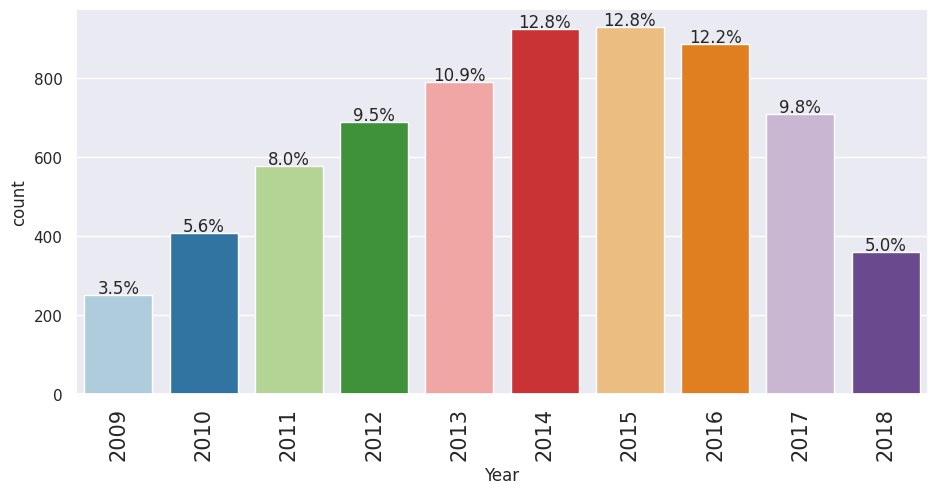

In [ ]:
labeled_barplot(df1, "Year", perc=True, n=10)

LOCATION

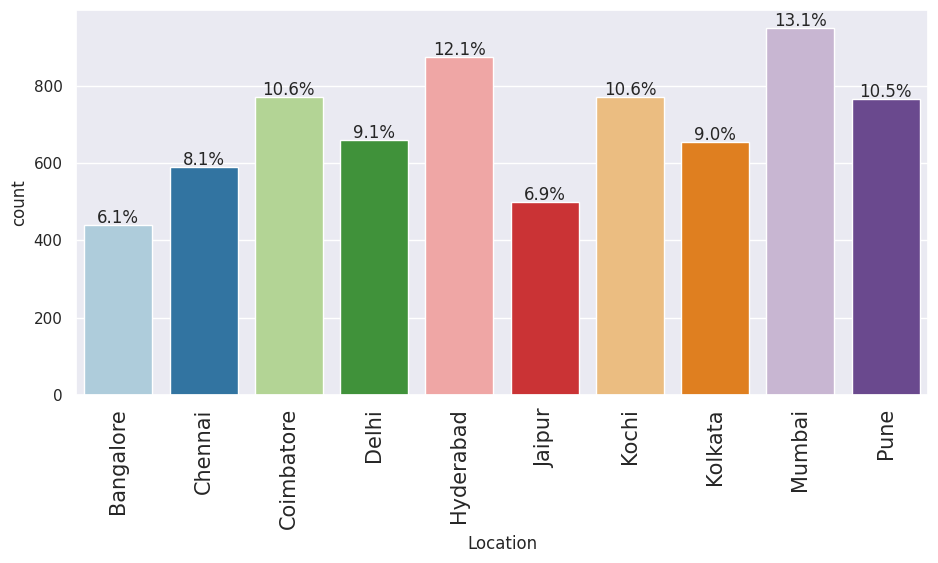

In [ ]:
labeled_barplot(df1, "Location", perc=True, n=10)

TRANSMISSION

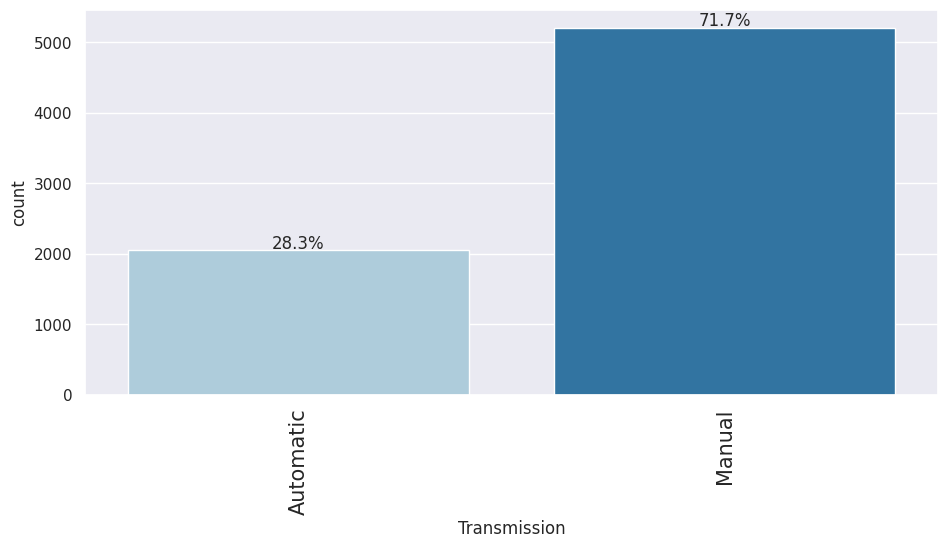

In [ ]:
labeled_barplot(df1, "Transmission", perc=True, n=10)

FUEL_TYPE

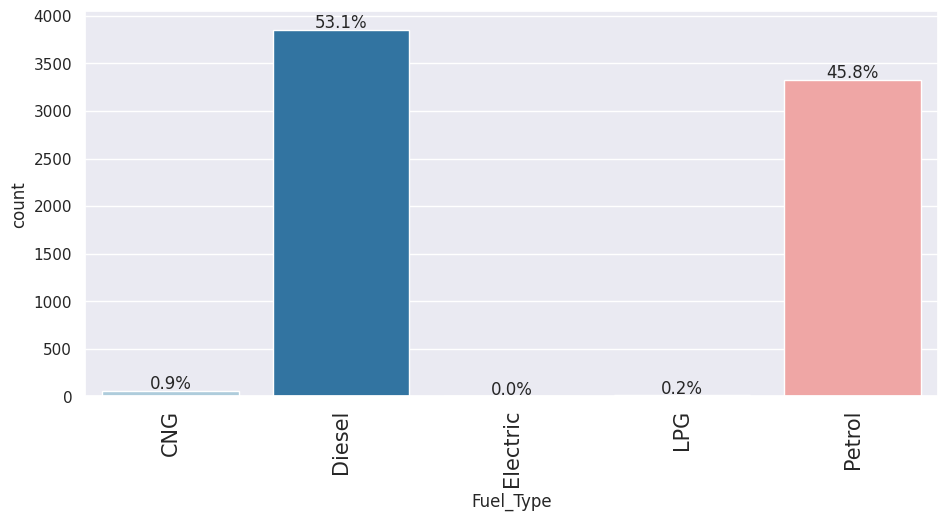

In [ ]:
labeled_barplot(df1, "Fuel_Type", perc=True, n=10)

OWNER_TYPE

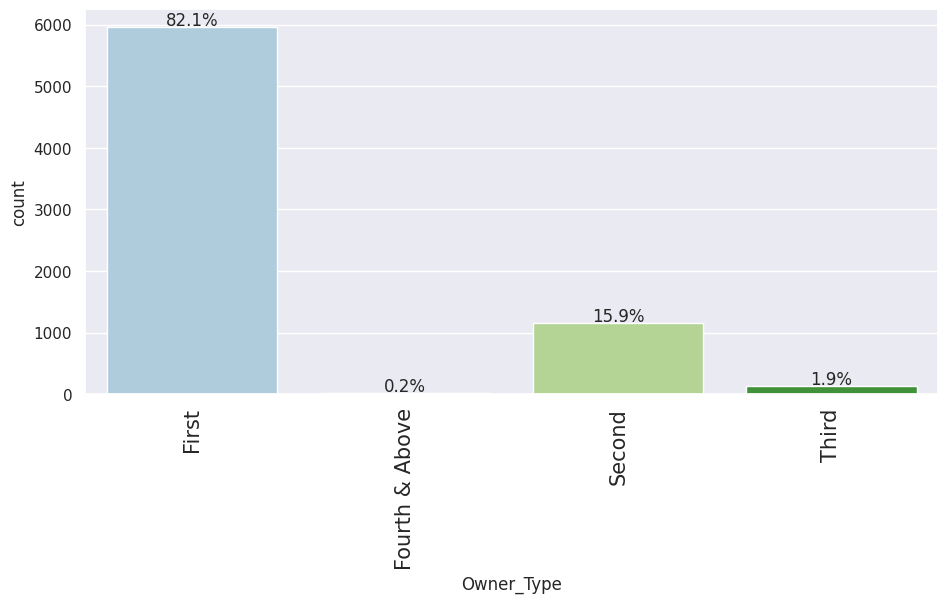

In [ ]:
# create labeled_barplot
labeled_barplot(df1, "Owner_Type", perc=True, n=10)

#BIVARIATE DISTRIBUTIONS

**correlation check**

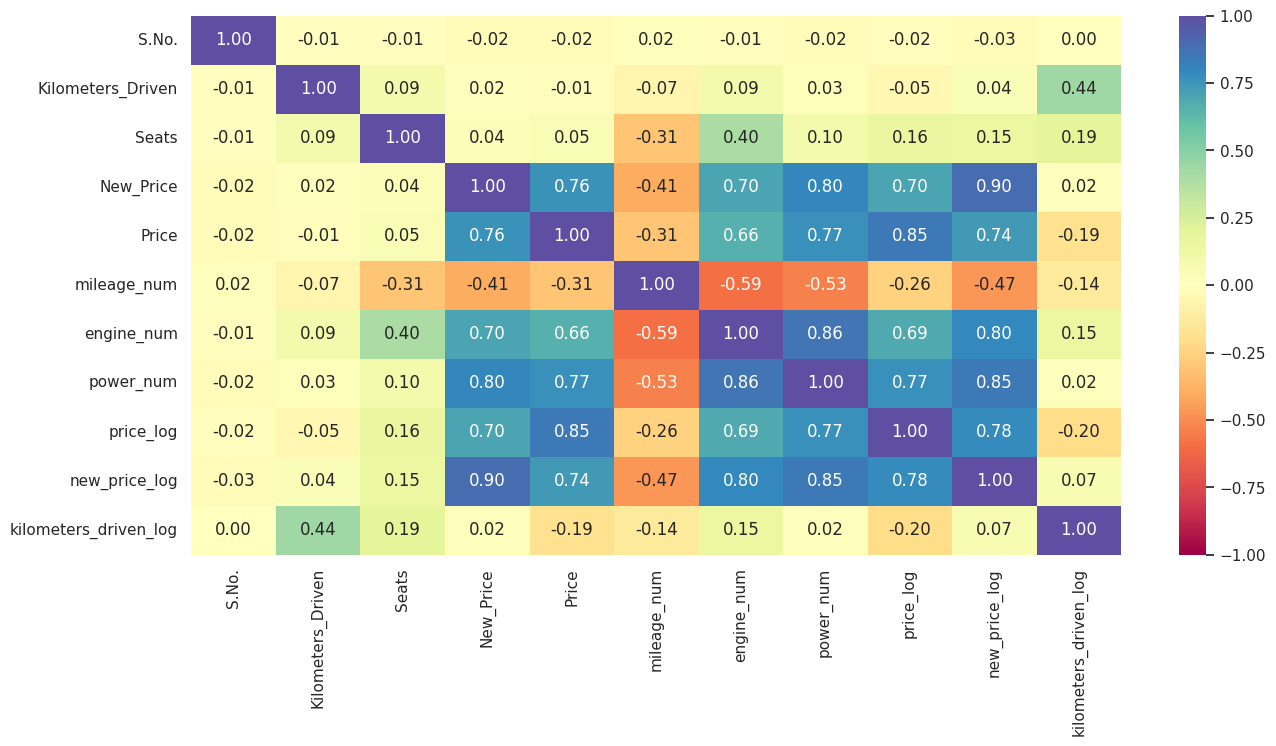

In [ ]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

In [ ]:
sns.pairplot(data=df1, hue="Fuel_Type")
plt.show()

KeyboardInterrupt: ignored

lets check the variation in 'Price' w/ some of the other variables


The location is important factor for used car price. Lets see how the price of cars varies across locations

#PRICE V LOCATION

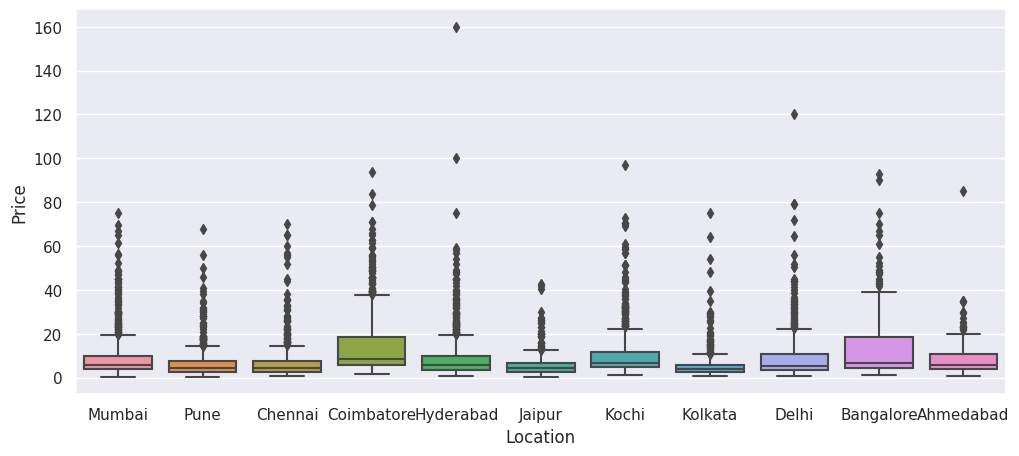

In [ ]:
## create a boxplot for 'Location' and 'Price'
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

#PRICE V YEAR

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x ='Year', y = 'Price', data=df1) # Complete the code to create a boxplot for 'Year' and 'Price'
plt.show()

#**lets see how the price of cars varies across brands**

#PRICE V BRAND

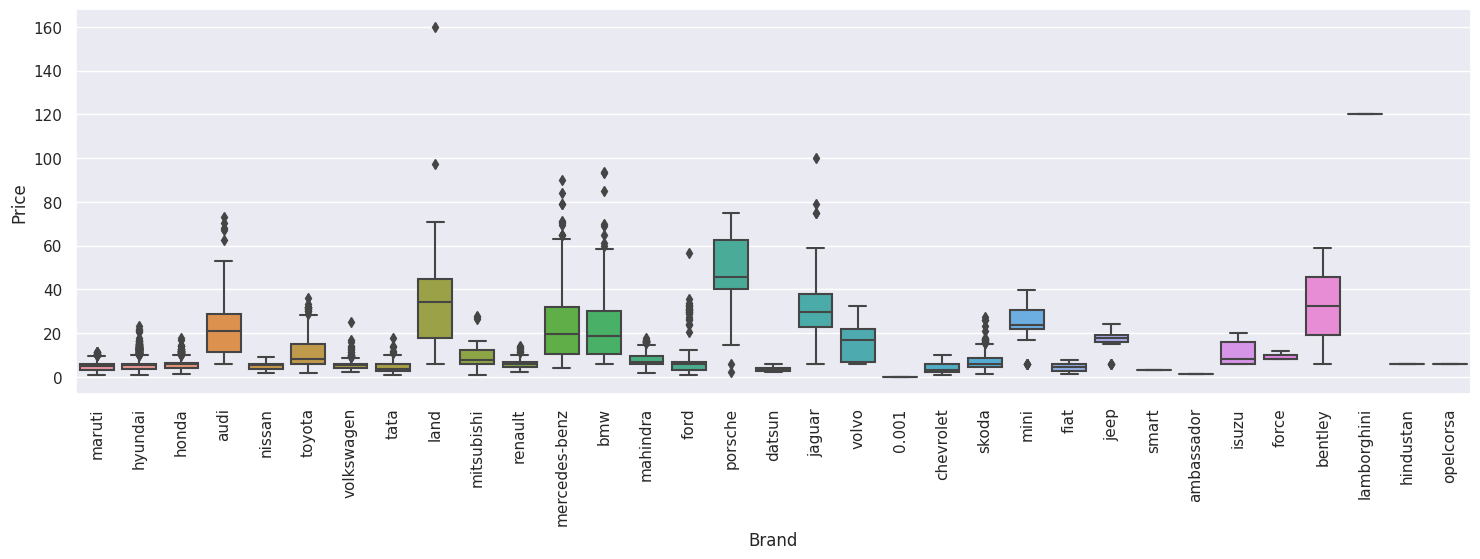

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x ='Brand', y = 'Price', data=df1)
plt.xticks(rotation=90)
plt.show()

#PRICE V TRANSMISSION

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x ='Transmission', y = 'Price', data=df1)
plt.show()

#PRICE V FUEL_TYPE

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x ='Fuel_Type', y = 'Price', data=df1)
plt.show()

#PRICE V OWNER_TYPE

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x ='Owner_Type', y = 'Price', data=df1)
plt.show()

In [ ]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

#MISSING VALUE TREATMENT

In [ ]:
df1.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           1
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
New_Price                   0
Price                    1234
mileage_num                 2
engine_num                 46
power_num                 175
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [ ]:
df1[df1['Seats'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
194,194,Ahmedabad,2007,60006.0,Petrol,Manual,First,NaN,13.580,2.95,0.00,NaN,NaN,honda,city,1.081805,2.608598,11.002200
208,208,Kolkata,2010,42001.0,Petrol,Manual,First,NaN,7.880,2.11,16.10,NaN,NaN,maruti,swift,0.746688,2.064328,10.645449
229,229,Bangalore,2015,70436.0,Diesel,Manual,First,NaN,7.650,3.60,0.00,1498.0,99.0,ford,figo,1.280934,2.034706,11.162460
733,733,Chennai,2006,97800.0,Petrol,Manual,Third,NaN,7.880,1.75,16.10,NaN,NaN,maruti,swift,0.559616,2.064328,11.490680
749,749,Mumbai,2008,55001.0,Diesel,Automatic,Second,NaN,120.000,26.50,0.00,NaN,NaN,land,rover,3.277145,4.787492,10.915107
1294,1294,Delhi,2009,55005.0,Petrol,Manual,First,NaN,13.580,3.20,12.80,NaN,NaN,honda,city,1.163151,2.608598,10.915179
1327,1327,Hyderabad,2015,50295.0,Petrol,Manual,First,NaN,7.880,5.80,16.10,NaN,NaN,maruti,swift,1.757858,2.064328,10.825661
1385,1385,Pune,2004,115000.0,Petrol,Manual,Second,NaN,13.580,1.50,0.00,NaN,NaN,honda,city,0.405465,2.608598,11.652687
1460,1460,Coimbatore,2008,69078.0,Petrol,Manual,First,NaN,120.000,40.88,0.00,NaN,NaN,land,rover,3.710641,4.787492,11.142992
1917,1917,Jaipur,2005,88000.0,Petrol,Manual,Second,NaN,13.580,1.70,13.00,1493.0,100.0,honda,city,0.530628,2.608598,11.385092


We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the **Brand** and **Model**.

In [ ]:
df1.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [ ]:
# imputing missing values in Seats
df1["Seats"] = df1.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
# complete the code to check the missing values in 'Seats' column

In [ ]:
df1[df1["Seats"].isnull()] # complete the code to check the missing values in 'Seats' column

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
2369,2369,Chennai,2008,56000.0,Petrol,Manual,Second,NaN,7.88,1.50,19.5,1061.0,NaN,maruti,estilo,0.405465,2.064328,10.933107
3882,3882,Kolkata,2010,40000.0,Petrol,Manual,Second,NaN,7.88,2.50,19.5,1061.0,NaN,maruti,estilo,0.916291,2.064328,10.596635
5893,5893,Chennai,2008,51000.0,Petrol,Manual,Second,NaN,7.88,1.75,19.5,1061.0,NaN,maruti,estilo,0.559616,2.064328,10.839581


We will use a similar method to fill missing values for the **Kilometers_Driven, mileage_num, engine_num, and power_num columns**.

In [ ]:
cols_list = ["Kilometers_Driven", "mileage_num", "engine_num", "power_num"]

for col in cols_list:
    df1[col] = df1.groupby(["Brand", "Model"])[col].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       3
New_Price                   0
Price                    1234
mileage_num                 2
engine_num                  0
power_num                  12
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [ ]:
cols_list = ["kilometers_driven_log","mileage_num", "Seats", "power_num","Price","price_log"] # complete the code to specify the column(s) for which missing values have to be filled

for col in cols_list:5
df1[col] = df1.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       3
New_Price                   0
Price                    1234
mileage_num                 2
engine_num                  0
power_num                  12
Brand                       0
Model                       0
price_log                   2
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [ ]:
cols_list = ["kilometers_driven_log","mileage_num", "Seats", "power_num","Price","price_log"] # complete the code to specify the column(s) for which missing values have to be filled

for col in cols_list:
    df1[col] = df1[col].fillna(df1[col].median())

df1.isnull().sum()

S.No.                    0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

In [ ]:
df1.dropna(subset=["Price"], inplace=True) # complete the code to drop the missing values in 'Price' column

# reapplying the log transform to the Kilometers_Driven column.
df1["kilometers_driven_log"] = np.log(df1["Kilometers_Driven"])

# checking for missing values
df1.isnull().sum()

S.No.                    0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

In [ ]:
# dropping the redundant columns
df1.drop(columns=["Kilometers_Driven"], inplace=True)

In [ ]:
df1.isnull().sum()

S.No.                    0
Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

#MODEL BUILDING - LINEAR REGRESSION

**Model Performance Check**

Let's check the performance of the model using different metrics.

-We will be using metric functions defined in sklearn for RMSE, MAE, and R2
-We will define a function to calculate MAPE and adjusted R2
-We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df1_perf = pd.DataFrame(
        {"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape,},index=[0])

    return df1_perf

1. We want to predict the used car price. As Price is a skewed variable, we will try building a model using both the actual variable and its normalized version price_log.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

**DATA PREPERATION FOR MODELING W/ PRICE AS DEPENDENT VARIABLE**

In [ ]:
df1['price_log'].replace([0.0],0.001,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # sklearn packages randomized data splitting function
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
# defining the dependent and independent variables
X = df1.drop(["Price", "price_log"], axis=1)
y = df1["Price"] # complete the code to set 'Price' as the target variable


print(X.head())
print()
print(y.head())

   S.No.    Location  Year Fuel_Type Transmission Owner_Type  Seats  \
0      0      Mumbai  2010       CNG       Manual      First    5.0   
1      1        Pune  2015    Diesel       Manual      First    5.0   
2      2     Chennai  2011    Petrol       Manual      First    5.0   
3      3     Chennai  2012    Diesel       Manual      First    7.0   
4      4  Coimbatore  2013    Diesel    Automatic     Second    5.0   

   New_Price  mileage_num  engine_num  power_num    Brand   Model  \
0       5.51        26.60       998.0      58.16   maruti   wagon   
1      16.06        19.67      1582.0     126.20  hyundai   creta   
2       8.61        18.20      1199.0      88.70    honda    jazz   
3      11.27        20.77      1248.0      88.76   maruti  ertiga   
4      53.14        15.20      1968.0     140.80     audi      a4   

   new_price_log  kilometers_driven_log  
0       1.706565              10.858999  
1       2.776332              10.621327  
2       2.152924              10

In [ ]:
# creating dummy variables
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)

 ## Complete the code to create dummies for independent features

X.head()# creating dummy variables

,S.No.,Year,Seats,New_Price,mileage_num,engine_num,power_num,new_price_log,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_hindustan,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opelcorsa,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1.4gsi,Model_1000,Model_3,Model_370z,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_abarth,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_flying,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_land,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_motors,Model_mu,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,0,2010,5.0,5.51,26.60,998.0,58.16,1.706565,10.858999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


**Model Building - Linear Regression with 'Price' as Dependent variable**

In [ ]:
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train) ## Complete the code to fit the model

LinearRegression()

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
lin_reg_model1_perf_train = model_performance_regression(lin_reg_model1, x_train, y_train)
lin_reg_model1_perf_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.079545,2.792781,0.744222,0.729571,46.558471


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test) ## Complete the code to check the performance on test data
lin_reg_model1_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.966161,3.023879,0.697538,0.65376,49.87113


**Data Preparation for modeling with 'price_log' as Dependent variable**

In [ ]:
# defining the dependent and independent variables
X = df1.drop(["Price", "price_log"], axis=1)
y = df1["price_log"] # complete the code to set 'price_log' as the target variable

In [ ]:
# creating dummy variables
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)

## Complete the code to create dummies for independent features

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train2, y_test2 = train_test_split(X,y, test_size=.30,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


**Model Building - Linear Regression with 'price_log' as Dependent variable**

In [ ]:
df1[df1['price_log'] < 0] = 0.001

In [ ]:
df1[df1['price_log'] == 0] = 0.001

In [ ]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train2) ## Complete the code to fit the model

LinearRegression()

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
lin_reg_model2_perf_train = model_performance_regression(lin_reg_model2, x_train2, y_train2)
lin_reg_model2_perf_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.249795,0.176313,0.910021,0.904867,77.828481


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test2) ## Complete the code to check the performance on test data
lin_reg_model2_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281336,0.189198,0.891365,0.875641,77.963376


#MODEL PERFORMANCE COMPARISON

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat([lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1)

models_train_comp_df.columns = ["Linear Regression (Price)","Linear Regression (price_log)"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,5.079545,0.249795
MAE,2.792781,0.176313
R-squared,0.744222,0.910021
Adj. R-squared,0.729571,0.904867
MAPE,46.558471,77.828481


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat([lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1)

models_test_comp_df.columns = ["Linear Regression (Price)","Linear Regression (price_log)"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,5.966161,0.281336
MAE,3.023879,0.189198
R-squared,0.697538,0.891365
Adj. R-squared,0.653760,0.875641
MAPE,49.871130,77.963376
